In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
Faamg = pd.read_csv('Faamg2017.csv')

In [ ]:
Faamg
Faamg.drop('Unnamed: 0', axis= 1, inplace = True)

In [ ]:
def alocação_ativos(df, valor_monetário, seed= 0, melhores_pesos = []):

  if seed != 0:
    np.random.seed(seed)

  df = df.copy()

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:
    pesos = np.random.random(len(df.columns) - 1)
    pesos = pesos / pesos.sum()

  columns_ = df.columns[1:]

  for i in columns_:
    df[i] = (df[i] / df[i][0])

  for i, stock in enumerate(columns_):
    df[stock] = df[stock] * pesos[i] * valor_monetário

  # if df.columns[0] == 'Unnamed: 0':
  #   df.drop(df.columns[0], axis = 1, inplace = True)

  df['Total'] = df.sum(axis= 1, numeric_only= float)

  datas = df['Date']

  df['Retorno (%)'] = 0.0
  for i in range(1, len(df)):
    df['Retorno (%)'][i] = (df['Total'][i] / df['Total'][i - 1] - 1) * 100

  retorno_total = df.loc[len(df) - 1]['Total']
  pesos_das_ações = pd.DataFrame(data = {'Ações': columns_, 'Pesos': pesos * 100})

  return df, datas, pesos_das_ações, retorno_total

In [ ]:
df, datas, pesos_das_ações, _ = alocação_ativos(Faamg, 1000)

<ipython-input-4-18f5d314b5fe>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Retorno (%)'][i] = (df['Total'][i] / df['Total'][i - 1] - 1) * 100


In [ ]:
pesos_das_ações

,Ações,Pesos
0,META,25.583763
1,AMZN,30.073890
2,AAPL,21.368451
3,MSFT,15.041483
4,GOOG,7.932414


In [ ]:
df

In [ ]:
df['Total'][252]

1518.4365972122157

In [ ]:
datas

0       2017-01-03
1       2017-01-04
2       2017-01-05
3       2017-01-06
4       2017-01-09
           ...    
1505    2022-12-23
1506    2022-12-27
1507    2022-12-28
1508    2022-12-29
1509    2022-12-30
Name: Date, Length: 1510, dtype: object

In [ ]:
figura = px.line(title = 'Evolução do patrimônio')
for i in df.drop(columns= ['Date', 'Retorno (%)']).columns:
  figura.add_scatter(x= datas, y= df[i], opacity= True, name=i)
figura.show()

In [ ]:
valor_monetário = df.loc[0]['Total']
valor_monetário

1000.0

### Sharpe Ratio



In [ ]:
# taxa composta = ( 1 + x ) ** 252

valor_monetário = 1000

selic_anual = np.array([7.0, 6.5, 4.5, 2.0, 9.25, 13.75])
anos = len(selic_anual)

capital_selic_final = valor_monetário
for taxa in selic_anual:
  capital_selic_final *= (1 + taxa / 100)
capital_selic_final

selic_composta = ((capital_selic_final / valor_monetário) ** (1 / anos) - 1).round(2)
selic_composta

0.07

In [ ]:
capital_selic_final

1509.4637875504686

In [ ]:
retornos_anuais = [df['Total'][df['Date'] == '2017-12-29'],df['Total'][df['Date'] == '2018-12-31'],df['Total'][df['Date'] == '2019-12-31'],df['Total'][df['Date'] == '2020-12-31'],df['Total'][df['Date'] == '2021-12-31'],df['Total'][df['Date'] == '2022-12-30']]

retornos_anuais



[250    1475.497683
 Name: Total, dtype: float64,
 501    1525.150893
 Name: Total, dtype: float64,
 753    2240.882891
 Name: Total, dtype: float64,
 1006    3585.466152
 Name: Total, dtype: float64,
 1258    4473.93106
 Name: Total, dtype: float64,
 1509    2645.459859
 Name: Total, dtype: float64]

In [ ]:
# ret_anual = np.array([df['Total'][252],df['Total'][501],df['Total'][753],df['Total'][1006],df['Total'][1258],df['Total'][1509]])

# ret_anual.mean()

In [ ]:
cf_df = np.array([1447.72, 1529.54, 2277.32, 3593.62, 4704.39, 2956.55])
taxas_np = np.array([])

taxa_df = []
taxas = []

for i in range(0, len(cf_df)):
  if i == 0:
    taxa_df_at = (cf_df[i] / valor_monetário) - 1
    taxas.append(taxa_df_at)
    taxa_df += taxa_df_at
  else:
     taxa_df_at = (cf_df[i] / cf_df[i - 1]) - 1
     taxas.append(taxa_df_at)
     taxa_df += taxa_df_at

taxa_df = np.append(taxa_df, taxas)
taxa_média_df_final = taxa_df.mean()
print(taxa_média_df_final)
print('')
print(taxas)

0.2514489488062623

[0.4477200000000001, 0.056516453457850835, 0.48889208520208705, 0.5780039695782762, 0.30909500726287154, -0.3715338226635122]


In [ ]:
sharpe_ratio = (taxa_média_df_final  - selic_composta) /  taxa_df.std()
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

Sharpe Ratio: 0.56


### Markowitz


In [ ]:
Faamg

,Date,META,AMZN,AAPL,MSFT,GOOG
0,2017-01-03,116.860001,37.683498,29.037500,62.580002,39.306999
1,2017-01-04,118.690002,37.859001,29.004999,62.299999,39.345001
2,2017-01-05,120.669998,39.022499,29.152500,62.299999,39.701000
3,2017-01-06,123.410004,39.799500,29.477501,62.840000,40.307499
4,2017-01-09,124.900002,39.846001,29.747499,62.639999,40.332500
...,...,...,...,...,...,...
1505,2022-12-23,118.040001,85.250000,131.860001,238.729996,89.809998
1506,2022-12-27,116.879997,83.040001,130.029999,236.960007,87.930000
1507,2022-12-28,115.620003,81.820000,126.040001,234.529999,86.459999
1508,2022-12-29,120.260002,84.180000,129.610001,241.009995,88.949997


In [ ]:
from sys import maxsize

In [ ]:
def alocação_portfólio(df, valor_monetário, risk_free, repetitions):
  df = df.copy()
  df_original = df.copy()

  lista_retorno_esperado = []
  lista_volatilidade_esperada = []
  lista_sharpe_ratio = []

  melhor_sharpe_ratio = 1 - maxsize # o menor valor possível
  melhores_pesos = np.empty
  melhor_volatilidade = 0
  melhor_retorno = 0

  for _ in range(repetitions):
    pesos = np.random.random(len(df.columns) - 1)
    pesos = pesos / pesos.sum()

    for i in df.columns[1:]:
      df[i] = df[i] / df[i][0]

    for i, stock in enumerate(df.columns[1:]):
      df[stock] = df[stock] * pesos[i] * valor_monetário


    df.drop(labels= ['Date'], axis= 1, inplace= True)

    retorno_carteira = np.log(df / df.shift(1))
    matriz_cov = retorno_carteira.cov()

    df['Soma dos valores'] = df.sum(axis = 1, numeric_only= float)

    ret_anual = np.array([df['Soma dos valores'][252],
                          df['Soma dos valores'][501],
                          df['Soma dos valores'][753],
                          df['Soma dos valores'][1006],
                          df['Soma dos valores'][1258],
                          df['Soma dos valores'][1509]])
    Rp = []
    Rp_np = []
    for i in range(len(ret_anual)):
      if i == 0:
        taxa_retorno = (ret_anual[0] / valor_monetário) - 1
        Rp.append(taxa_retorno)
      else:
        taxa_retorno = (ret_anual[i] / ret_anual[i - 1]) - 1
        Rp.append(taxa_retorno)

    Rp_np = np.append(Rp_np, Rp)
    taxa_média_de_retorno = Rp_np.mean()

    # df['Taxa de retorno'] = 0.0

    # for i in range(1, len(df)):
    #   df['Taxa de retorno'][i] = np.log(df['Soma dos valores'][i] / df['Soma dos valores'][i - 1])

    retorno_esperado = taxa_média_de_retorno
    vol_esperada = Rp_np.std()#np.sqrt(np.dot(pesos, np.dot(matriz_cov * 252, pesos)))
    sharpe_ratio = (taxa_média_de_retorno - risk_free) / Rp_np.std()

    if  sharpe_ratio > melhor_sharpe_ratio:
      melhor_sharpe_ratio = sharpe_ratio
      melhores_pesos = pesos
      melhor_volatilidade = vol_esperada
      melhor_retorno = retorno_esperado

    lista_retorno_esperado.append(retorno_esperado)
    lista_volatilidade_esperada.append(vol_esperada)
    lista_sharpe_ratio.append(sharpe_ratio)

    df = df_original.copy()

  return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno

In [ ]:
sharpe_ratio, melhores_pesos, ls_retorno, ls_vol, ls_sharpe_ratio, melhor_vol, melhor_retorno = alocação_portfólio(Faamg, 1000, selic_composta, 10000)

In [ ]:
_, _, pesos_das_ações, retorno_total = alocação_ativos(Faamg, 1000, melhores_pesos= melhores_pesos);

<ipython-input-4-18f5d314b5fe>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pesos_das_ações, retorno_total

(  Ações      Pesos
 0  META   0.040611
 1  AMZN   8.507586
 2  AAPL  36.929359
 3  MSFT  48.943957
 4  GOOG   5.578487,
 3844.0499325111405)

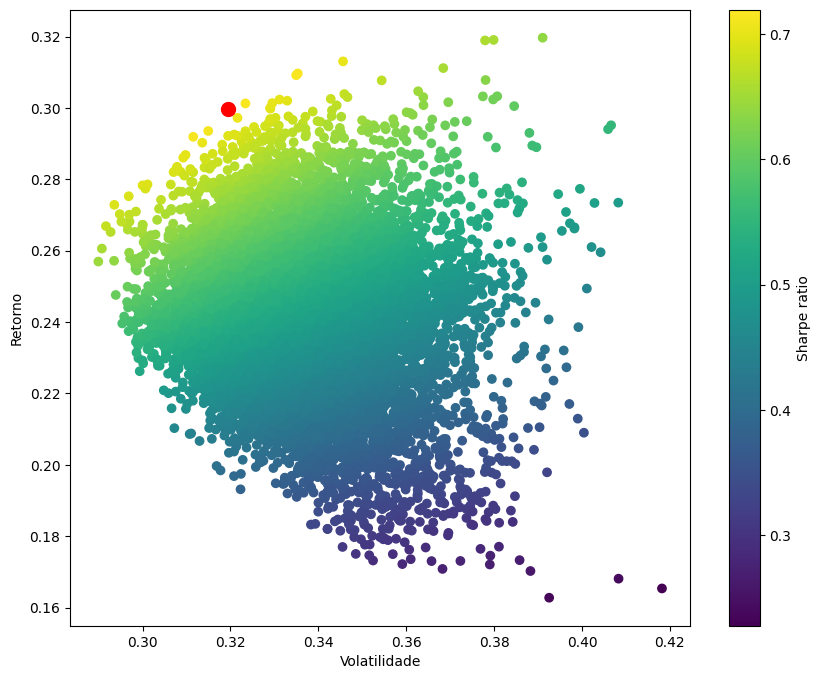

In [ ]:
plt.figure(figsize= (10,8))
plt.scatter(ls_vol, ls_retorno, c= ls_sharpe_ratio)
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_vol, melhor_retorno, c= 'red', s= 100)